In [0]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1BgkNLDFEbH9IH6i-fQ4dNNlSXC212wjN'})


In [0]:
download.GetContentFile('DOWNLOAD.json')

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
df=pd.read_json('DOWNLOAD.json', lines=True)
df1=df
df2=df
df
df['unixTimestamp']=(pd.to_datetime(df['unixTimestamp']))

df['d'] = df['unixTimestamp'].dt.day
df = df.groupby(['d','browserId'])['unixTimestamp'].count().reset_index(name="freq")

result = df[df.freq >= 2]

# only user ids matching criteria
user_ids = result.browserId.tolist()
print(user_ids)
retention = df1['browserId'].isin(user_ids)
df1['Ret'] = '0'
df1['Ret']=retention
dfpure=df1.drop_duplicates(subset=['browserId'], keep='first')
dfpure.groupby(['Ret']).sum()
dfpure=df1.drop_duplicates(subset=['browserId'], keep='first')
dfpure.drop(dfpure.loc[dfpure['isFirstVisit']==False].index, inplace=True)

['++0ql4dIZ6xbkzzqjvwZ4A==', '++HEkBlWuIQlkp/hfXDJ9w==', '+/LA928OlJT6VRLd34BhDQ==', '+/Md2UxKm27JVuqFn7tnZg==', '+/P9shIzNgFObJNu3JNssw==', '+/dOncDhx8YEQZ4XZ8p9cA==', '+02WXqSnY/csUmw8Uq+/Tg==', '+07FZ3OTOBHBILKm2wW3/A==', '+0gYX/rElRfkOwaSedzKLQ==', '+0myJicU7StBktpC8/9ECw==', '+2F7yESSpVw/BirbJuyDNQ==', '+2pgqgbdqrYEZxvA+oTtBA==', '+33vYqDXW9VmwKmiX7AajQ==', '+3AvnExG/DGr41HlPgeawg==', '+3SppkZKKrVEj11xEaOJcw==', '+3Zoccre+ujQMCbiDo/ang==', '+3cQlYRvN3w1Q/ECL9VKIA==', '+4QP4SqoYaJm1FBHZYGgrg==', '+4TWRg1wR/YcfnEPqjA5Aw==', '+4o+cXuckhj7fIilFZeVtg==', '+4vki79iphQAilMt6YMmYg==', '+4xn8HjOuGz8udr4nCR7tA==', '+5+osr3aInid1OSA3Z7g1A==', '+55Eisurb0we3WuH7oZnLw==', '+6DcqruH18lF2LfffPbpSg==', '+6KJ4WUdkI5DQnRxSkbOEQ==', '+6at1HgvwK5AY/D9knQjaQ==', '+84IxgiVKN0atIUNvtUAiw==', '+90OwhcKJ9SLQko5mTLPlA==', '+9CM8MABldlGeSB8t8e5Qg==', '+9CTmSCkENcvUntFrbiuKQ==', '+9LOahASGor1f9qH45UFtQ==', '+A0iubbHTcrcpLmEm+otwg==', '+ABtn7Q2fzRTNA0+hLidPg==', '+AKF4IFXpcuvZk0RJbqkyQ==', '+AMmPwAdZRSLGdksBK

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
df1.describe()

,adblockerStatus,dmaCode,hasAccess,hour,isNewVisit,newsletter,parsedReferrerId,referrerSegmentId,submissionCount,timezoneOffset,d
count,50000.000000,50000.000000,50000.000000,50000.0,49999.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.0
mean,0.034060,479.001960,0.001720,0.0,0.590692,0.02036,10.043720,2.448860,1.106680,-274.15230,1.0
std,0.406427,300.014112,0.041438,0.0,0.491711,0.14123,4.387536,1.182545,0.336127,264.59555,0.0
min,-2.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,1.000000,-660.00000,1.0
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,11.000000,2.000000,1.000000,-420.00000,1.0
50%,0.000000,533.000000,0.000000,0.0,1.000000,0.00000,11.000000,2.000000,1.000000,-300.00000,1.0
75%,0.000000,751.000000,0.000000,0.0,1.000000,0.00000,13.000000,4.000000,1.000000,-300.00000,1.0
max,1.000000,881.000000,1.000000,0.0,1.000000,1.00000,13.000000,4.000000,7.000000,840.00000,1.0


In [0]:
retention = df1['browserId'].isin(user_ids)
df1['Ret'] = '0'

dfpure=df1.drop_duplicates(subset=['browserId'], keep='first')
pd.isna(dfpure).sum() #counting NaN 

accessedResources       0
adblockerStatus         0
aid                     0
browser                 0
browserId               0
city                 2418
content                 0
contentAuthor           0
contentCreated       4521
contentSection          0
country                 0
countryCode            17
customParamList         0
customParams            0
dmaCode                 0
fingerprint             0
globalBrowserId         0
hasAccess               0
hour                    0
ip                      0
isFirstVisit            0
isNewVisit              1
newsletter              0
node                    0
operatingSystem         0
originalUrl             0
pageSessionId           0
pageViewId              0
parsedReferrer          0
parsedReferrerId        0
platform                0
rawReferrer             0
rawUserAgent            0
referrerSegment         0
referrerSegmentId       0
region               2482
resourceIds             0
sailthruCookie          0
source      

In [0]:
dfauth=dfpure.groupby('contentAuthor').sum()
# top autors
dfauth.sort_values("isNewVisit", na_position = 'last') 
dfauth.iloc[::-1]
dfauth

,adblockerStatus,dmaCode,hasAccess,hour,isFirstVisit,isNewVisit,newsletter,parsedReferrerId,referrerSegmentId,submissionCount,timezoneOffset,d
contentAuthor,,,,,,,,,,,,
+9o9hW76vjAM3iA6sAvXzg==,3,15807,0,0,11.0,32.0,2,241,63,34,-8640,34
+JIx4Nypl123rOsgL8OUfA==,0,511,0,0,1.0,1.0,0,0,1,1,-480,1
+OtGNi+Wkf59pjgnFiRcFg==,1,0,0,0,0.0,1.0,0,13,2,1,0,1
+VpaBcaysFqukfCrx0ikuA==,0,512,0,0,4.0,4.0,0,50,10,4,-1560,4
+blLmk+s2fCNHBc088yAew==,0,3745,0,0,3.0,5.0,0,13,6,5,-2160,5
+fiuZdtipJpKb16VJlW4ow==,0,855,0,0,0.0,1.0,0,5,1,1,-480,1
+fr7QezbyuXNEacMaSWpbA==,1,0,0,0,1.0,2.0,0,25,5,2,60,2
+iF68Bgte0Q+5eH0T1A68g==,1,37948,0,0,48.0,89.0,0,706,170,92,-27000,92
+jzn9Vr6IDFbGB5rF3yN/Q==,0,501,0,0,1.0,1.0,0,12,3,1,-300,1


In [0]:
dfpure.drop(dfpure.loc[dfpure['isFirstVisit']==False].index, inplace=True) #leaving only first time visitors set

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

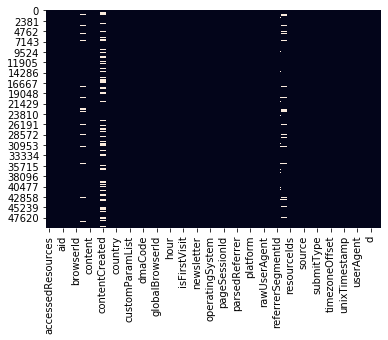

In [0]:
sns.heatmap(df1.isnull(), cbar=False) #misssing values in initial dataset

In [0]:
import missingno as msno

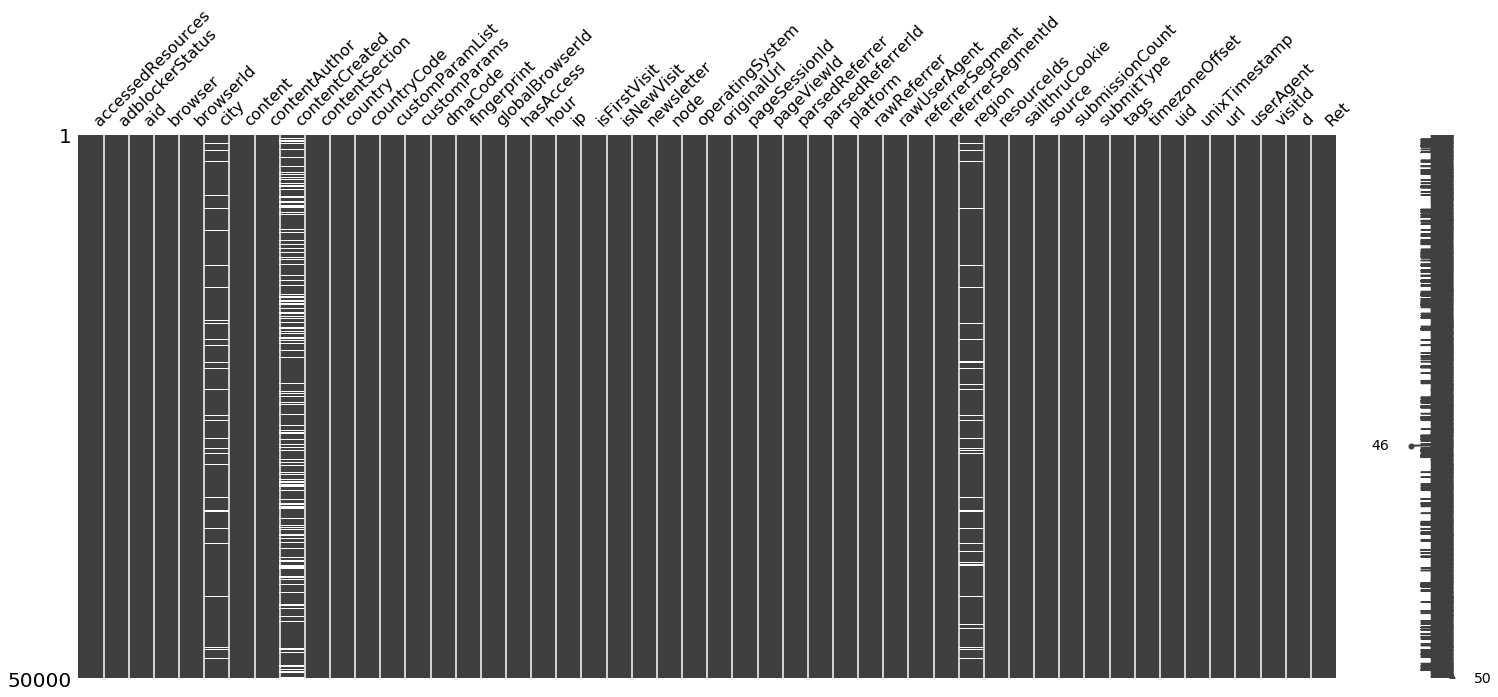

In [0]:
msno.matrix(df1) #missing values for df

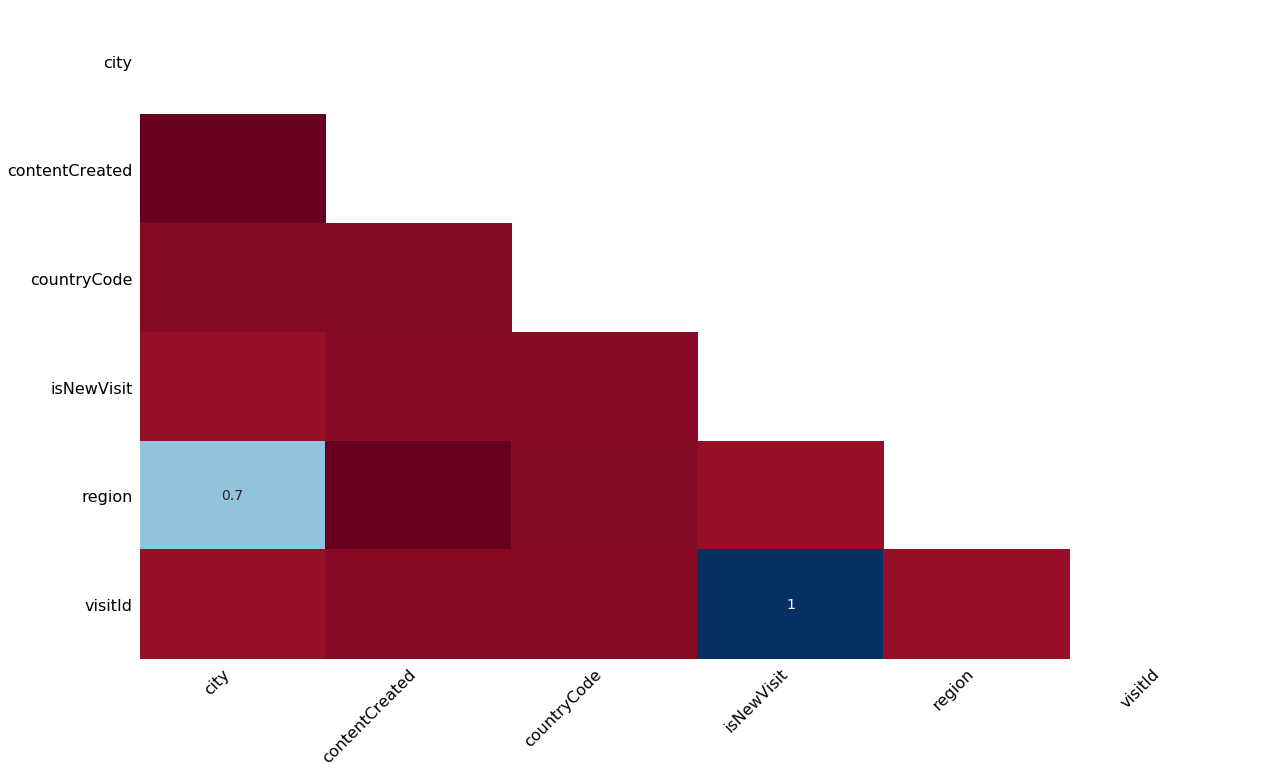

In [0]:
msno.heatmap(df1) #the correlation matrix about the locations of missing values in columns.

In [0]:
gf=dfpure[['city', 'Ret', ]]

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


TypeError: ignored

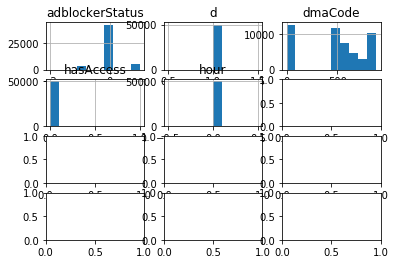

In [0]:
	
df1.hist()

In [0]:
pip install --upgrade matplotlib --ignore-installed six

In [0]:
sns.catplot(x="city", y="Ret", hue="Retenton by day",
            kind="violin");

In [0]:
bytreatment = dfpure.groupby("city")

In [0]:
bytreatment["city"].describe()

,count,unique,top,freq
city,,,,
Abbotsford,2,1,Abbotsford,2
Aberdeen,4,1,Aberdeen,4
Abidjan,1,1,Abidjan,1
Abilene,3,1,Abilene,3
Abingdon,1,1,Abingdon,1
Abington,2,1,Abington,2
Absecon,2,1,Absecon,2
Accra,6,1,Accra,6
Acme,1,1,Acme,1


In [0]:
dfcity=df1.groupby('city').sum() #cities, gving a maximum number of new visits
dfc=dfcity.sort_values('isFirstVisit', na_position = 'first') 
dfc=dfc.iloc[::-1]
dfc

,adblockerStatus,dmaCode,hasAccess,hour,isFirstVisit,isNewVisit,newsletter,parsedReferrerId,referrerSegmentId,submissionCount,timezoneOffset,d
city,,,,,,,,,,,,
Ashburn,-9,144613,0,0,212.0,245.0,18,3400,594,293,-32820,283
Chicago,-5,385882,0,0,161.0,373.0,18,6331,1476,712,-233340,641
Los Angeles,65,676126,7,0,138.0,454.0,16,8202,2094,917,-390930,842
San Jose,-4,481779,0,0,117.0,333.0,5,6420,1473,667,-260700,597
New York,59,394287,4,0,107.0,438.0,24,7775,1956,890,-241290,787
Singapore,20,0,0,0,94.0,316.0,13,7226,1698,733,284700,650
San Francisco,1,391395,1,0,86.0,309.0,4,4547,1067,539,-227820,485
Seattle,23,312039,0,0,86.0,254.0,4,3444,854,412,-177600,381
Brooklyn,24,177855,2,0,83.0,206.0,4,3506,895,396,-109320,355


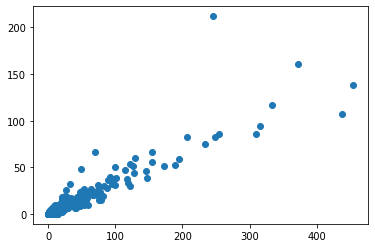

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'New visits from first visits')

In [0]:


y = dfc['isFirstVisit']
x = dfc['isNewVisit']

plt.plot(x, y, 'o')
plt.show()
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('New visits from first visits')